In [40]:
import numpy as np

In [74]:
import numpy as np

# Define the main function to solve the 3D Navier-Stokes equations
def navier_stokes_3d(dx, dy, dz, dt, nu, steps, u, v, w, p):
    # Define a function to build up the b term (for pressure)
     def build_up_b(b, rho, dt, u, v, w, dx, dy, dz):
          b[1:-1, 1:-1, 1:-1] = (rho * (1 / dt * ((u[1:-1, 1:-1, 2:] - u[1:-1, 1:-1, 0:-2]) / (2 * dx) +
                                             (v[1:-1, 2:, 1:-1] - v[1:-1, 0:-2, 1:-1]) / (2 * dy) +
                                             (w[2:, 1:-1, 1:-1] - w[0:-2, 1:-1, 1:-1]) / (2 * dz)) -
                                   ((u[1:-1, 1:-1, 2:] - u[1:-1, 1:-1, 0:-2]) / (2 * dx)) ** 2 -
                                   2 * ((u[1:-1, 2:, 1:-1] - u[1:-1, 0:-2, 1:-1]) / (2 * dy) *
                                        (v[1:-1, 1:-1, 2:] - v[1:-1, 1:-1, 0:-2]) / (2 * dx)) -
                                   2 * ((u[2:, 1:-1, 1:-1] - u[0:-2, 1:-1, 1:-1]) / (2 * dz) *
                                        (w[1:-1, 1:-1, 2:] - w[1:-1, 1:-1, 0:-2]) / (2 * dx)) -
                                   2 * ((v[2:, 1:-1, 1:-1] - v[0:-2, 1:-1, 1:-1]) / (2 * dz) *
                                        (w[1:-1, 2:, 1:-1] - w[1:-1, 0:-2, 1:-1]) / (2 * dy)) -
                                   ((v[1:-1, 2:, 1:-1] - v[1:-1, 0:-2, 1:-1]) / (2 * dy)) ** 2 -
                                   ((w[2:, 1:-1, 1:-1] - w[0:-2, 1:-1, 1:-1]) / (2 * dz)) ** 2))
          return b

    # Define a function to solve the pressure Poisson equation
     def pressure_poisson(p, dx, dy, dz, b):
          pn = np.empty_like(p)
          for q in range(nit):
               pn = p.copy()
               p[1:-1, 1:-1, 1:-1] = (((pn[1:-1, 1:-1, 2:] + pn[1:-1, 1:-1, 0:-2]) * dy ** 2 * dz ** 2 +
                                        (pn[1:-1, 2:, 1:-1] + pn[1:-1, 0:-2, 1:-1]) * dx ** 2 * dz ** 2 +
                                        (pn[2:, 1:-1, 1:-1] + pn[0:-2, 1:-1, 1:-1]) * dx ** 2 * dy ** 2) /
                                   (2 * (dx ** 2 + dy ** 2 + dz ** 2)) -
                                   dx ** 2 * dy ** 2 * dz ** 2 / (2 * (dx ** 2 + dy ** 2 + dz ** 2)) * b[1:-1, 1:-1, 1:-1])

               # Apply Neumann boundary conditions for pressure
               p[:, -1, :] = p[:, -2, :]
               p[0, :, :] = p[1, :, :]
               p[:, 0, :] = p[:, 1, :]
               p[-1, :, :] = p[-2, :, :]
               p[:, :, -1] = p[:, :, -2]
               p[:, :, 0] = p[:, :, 1]
          return p

    # Define a function to compute the cavity flow
     def cavity_flow(nt, u, v, w, dt, dx, dy, dz, p, rho, nu):
          un = np.empty_like(u)
          vn = np.empty_like(v)
          wn = np.empty_like(w)
          b = np.zeros((nz, ny, nx))

          for n in range(nt):
               un = u.copy()
               vn = v.copy()
               wn = w.copy()

               # Build up the b term and solve the pressure Poisson equation
               b = build_up_b(b, rho, dt, u, v, w, dx, dy, dz)
               p = pressure_poisson(p, dx, dy, dz, b)

               # Update the velocity fields (u, v, and w) using the given equations
               u[1:-1, 1:-1, 1:-1] = (un[1:-1, 1:-1, 1:-1] -
                                        un[1:-1, 1:-1, 1:-1] * dt / dx * (un[1:-1, 1:-1, 1:-1] - un[1:-1, 1:-1, 0:-2]) -
                                        vn[1:-1, 1:-1, 1:-1] * dt / dy * (un[1:-1, 1:-1, 1:-1] - un[1:-1, 0:-2, 1:-1]) -
                                        wn[1:-1, 1:-1, 1:-1] * dt / dz * (un[1:-1, 1:-1, 1:-1] - un[0:-2, 1:-1, 1:-1]) -
                                        dt / (2 * rho * dx) * (p[1:-1, 1:-1, 2:] - p[1:-1, 1:-1, 0:-2]) +
                                        nu * (dt / dx ** 2 * (un[1:-1, 1:-1, 2:] - 2 * un[1:-1, 1:-1, 1:-1] + un[1:-1, 1:-1, 0:-2]) +
                                             dt / dy ** 2 * (un[1:-1, 2:, 1:-1] - 2 * un[1:-1, 1:-1, 1:-1] + un[1:-1, 0:-2, 1:-1]) +
                                             dt / dz ** 2 * (un[2:, 1:-1, 1:-1] - 2 * un[1:-1, 1:-1, 1:-1] + un[0:-2, 1:-1, 1:-1])))

               v[1:-1, 1:-1, 1:-1] = (vn[1:-1, 1:-1, 1:-1] -
                                        un[1:-1, 1:-1, 1:-1] * dt / dx * (vn[1:-1, 1:-1, 1:-1] - vn[1:-1, 1:-1, 0:-2]) -
                                        vn[1:-1, 1:-1, 1:-1] * dt / dy * (vn[1:-1, 1:-1, 1:-1] - vn[1:-1, 0:-2, 1:-1]) -
                                        wn[1:-1, 1:-1, 1:-1] * dt / dz * (vn[1:-1, 1:-1, 1:-1] - vn[0:-2, 1:-1, 1:-1]) -
                                        dt / (2 * rho * dy) * (p[1:-1, 2:, 1:-1] - p[1:-1, 0:-2, 1:-1]) +
                                        nu * (dt / dx ** 2 * (vn[1:-1, 1:-1, 2:] - 2 * vn[1:-1, 1:-1, 1:-1] + vn[1:-1, 1:-1, 0:-2]) +
                                             dt / dy ** 2 * (vn[1:-1, 2:, 1:-1] - 2 * vn[1:-1, 1:-1, 1:-1] + vn[1:-1, 0:-2, 1:-1]) +
                                             dt / dz ** 2 * (vn[2:, 1:-1, 1:-1] - 2 * vn[1:-1, 1:-1, 1:-1] + vn[0:-2, 1:-1, 1:-1])))

               w[1:-1, 1:-1, 1:-1] = (wn[1:-1, 1:-1, 1:-1] -
                                        un[1:-1, 1:-1, 1:-1] * dt / dx * (wn[1:-1, 1:-1, 1:-1] - wn[1:-1, 1:-1, 0:-2]) -
                                        vn[1:-1, 1:-1, 1:-1] * dt / dy * (wn[1:-1, 1:-1, 1:-1] - wn[1:-1, 0:-2, 1:-1]) -
                                        wn[1:-1, 1:-1, 1:-1] * dt / dz * (wn[1:-1, 1:-1, 1:-1] - wn[0:-2, 1:-1, 1:-1]) -
                                        dt/ (2 * rho * dz) * (p[2:, 1:-1, 1:-1] - p[0:-2, 1:-1, 1:-1]) +
                                        nu * (dt / dx ** 2 * (wn[1:-1, 1:-1, 2:] - 2 * wn[1:-1, 1:-1, 1:-1] + wn[1:-1, 1:-1, 0:-2]) +
                                             dt / dy ** 2 * (wn[1:-1, 2:, 1:-1] - 2 * wn[1:-1, 1:-1, 1:-1] + wn[1:-1, 0:-2, 1:-1]) +
                                             dt / dz ** 2 * (wn[2:, 1:-1, 1:-1] - 2 * wn[1:-1, 1:-1, 1:-1] + wn[0:-2, 1:-1, 1:-1])))

          # Boundary conditions for the obstacle
          obstacle_mask = create_obstacle_mask(nx, ny, nz)
          u[obstacle_mask] = 0
          v[obstacle_mask] = 0
          w[obstacle_mask] = 0

          return u, v, w, p

    # Define a function to create a boolean mask for the obstacle
     def create_obstacle_mask(nx, ny, nz):
          # Create a boolean mask for the obstacle
          mask = np.zeros((nz, ny, nx), dtype=bool)
          x_center, y_center, z_center = nx // 2, ny // 2, nz // 2
          x_width, y_height, z_depth = nx // 10, ny // 10, nz // 10

          # Set the mask to True for the cells representing the obstacle
          mask[z_center - z_depth:z_center + z_depth, y_center - y_height:y_center + y_height, x_center - x_width:x_center + x_width] = True
          return mask

     ny, nx , nz= u.shape
     rho = 1
     nit = 50

     u_steps, v_steps, w_steps, p_steps = np.zeros((steps, ny, nx, nz)), np.zeros((steps, ny, nx, nz)), np.zeros((steps, ny, nx, nz)), np.zeros((steps, ny, nx, nz))

     # Set initial velocity field: left to right flow
     u[:, 0] = 10
     v[:, :] = 0
     w[:, :] = 0

     # Set obstacle velocity to zero
     obstacle_mask = create_obstacle_mask(nx, ny, nz)
     u[obstacle_mask] = 0
     v[obstacle_mask] = 0
     w[obstacle_mask] = 0

     for i in range(steps):
          u, v, w, p = cavity_flow(1, u, v, w, dt, dx, dy, dz, p, rho, nu)
          u_steps[i, :, :] = u
          v_steps[i, :, :] = v
          w_steps[i, :, :] = w
          p_steps[i, :, :] = p

     return u_steps, v_steps, w_steps, p_steps

In [97]:
# Simulation parameters
dx = 0.1
dy = 0.1
dz = 0.1
dt = 0.001
nu = 0.01
steps = 1000

# Initial conditions
u = np.zeros((int(1/dy)+1, int(1/dx)+1, int(1/dz)+1))
v = np.zeros((int(1/dy)+1, int(1/dx)+1, int(1/dz)+1))
w = np.zeros((int(1/dy)+1, int(1/dx)+1, int(1/dz)+1))
p = np.zeros((int(1/dy)+1, int(1/dx)+1, int(1/dz)+1))

In [98]:
# Running the simulation
u_steps, v_steps, w_steps, p_steps = navier_stokes_3d(dx, dy, dz, dt, nu, steps, u, v, w, p)

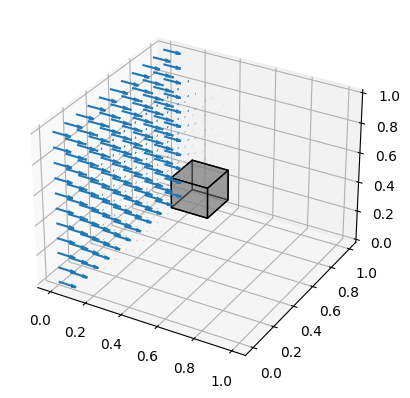

In [105]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation
# from matplotlib.patches import Rectangle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation
import matplotlib.colors as mcolors
from matplotlib.animation import PillowWriter

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def get_obstacle_mask_3d(nx, ny, nz, dx, dy, dz):
    x_center, y_center, z_center = nx // 2, ny // 2, nz // 2
    x_width, y_height, z_depth = nx // 10, ny // 10, nz // 10

    x_min, x_max = (x_center - x_width) * dx, (x_center + x_width) * dx
    y_min, y_max = (y_center - y_height) * dy, (y_center + y_height) * dy
    z_min, z_max = (z_center - z_depth) * dz, (z_center + z_depth) * dz

    vertices = np.array([
        [x_min, y_min, z_min],
        [x_max, y_min, z_min],
        [x_max, y_max, z_min],
        [x_min, y_max, z_min],
        [x_min, y_min, z_max],
        [x_max, y_min, z_max],
        [x_max, y_max, z_max],
        [x_min, y_max, z_max]
    ])

    faces = np.array([
        [0, 1, 2, 3],
        [4, 5, 6, 7],
        [0, 1, 5, 4],
        [1, 2, 6, 5],
        [2, 3, 7, 6],
        [3, 0, 4, 7]
    ])

    obstacle = Poly3DCollection(vertices[faces], facecolors='gray', edgecolor='k', alpha=0.5)

    return obstacle

# Visualization function
def update(frame_number):
    global u, v, w, p, dx, dy, dz, dt, nu

    ax.clear()
    strm = ax.streamplot(X, Y, Z, u_steps[frame_number], v_steps[frame_number], w_steps[frame_number], color=(np.sqrt(u_steps[frame_number]**2 + v_steps[frame_number]**2 + w_steps[frame_number]**2)), cmap=cm.inferno)

    obstacle = plot_obstacle_mask_3d(u.shape[1], u.shape[0], u.shape[2], dx, dy, dz)
    ax.add_collection(obstacle)

    ax.set_title("Time Step: {}".format(frame_number))
    ax.set_xlim(0, 1)  # Set x-axis limits
    ax.set_ylim(0, 1)  # Set y-axis limits
    ax.set_zlim(0, 1)  # Set z-axis limits

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

obstacle = get_obstacle_mask_3d(u.shape[1], u.shape[0], u.shape[2], dx, dy, dz)
ax.add_collection(obstacle)

X, Y, Z = np.meshgrid(np.arange(0, 1 + dx, dx), np.arange(0, 1 + dy, dy), np.arange(0, 1 + dz, dz))

step = -1
ax.quiver(X, Y, Z, u_steps[step], v_steps[step], w_steps[step], length=0.01)
plt.show()

# ani = FuncAnimation(fig, update, frames=range(steps), blit=False, repeat=False)

In [107]:
import plotly.graph_objs as go

step = -1
fig = go.Figure(data=go.Cone(x=X.ravel(), y=Y.ravel(), z=Z.ravel(),
                             u=u_steps[step].ravel(), v=v_steps[step].ravel(), w=w_steps[step].ravel(),
                             sizemode='scaled', sizeref=1))
fig.show()